<a href="https://colab.research.google.com/github/talukd74/C-Programing-/blob/main/Project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required file

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
import os
import math

#from brokenaxes import brokenaxes
from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense
from xgboost import XGBRegressor



import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

Importing dataset 

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Walmart/Walmart.csv')

Display data 

In [4]:
display(df.head())

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,5/2/2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12/2/2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,5/3/2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
originaldata_df = df.copy(deep=True)

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))


Inference: The Datset consists of 8 features & 6435 samples.


Display features data

In [6]:
df.Date=pd.to_datetime(df.Date)

df['weekday'] = df.Date.dt.weekday
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

# df['Monthly_Quarter'] = df.month.map({1:'Q1',2:'Q1',3:'Q1',4:'Q2',5:'Q2',6:'Q2',7:'Q3',
#                                       8:'Q3',9:'Q3',10:'Q4',11:'Q4',12:'Q4'})

df.drop(['Date'], axis=1, inplace=True)#,'month'

target = 'Weekly_Sales'
features = [i for i in df.columns if i not in [target]]
original_df = df.copy(deep=True)

df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


In [7]:
#Checking  columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   weekday       6435 non-null   int64  
 8   month         6435 non-null   int64  
 9   year          6435 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 502.9 KB


Checking Rows 

In [8]:
#Checking  unique rows in each feature

df.nunique().sort_values()

Holiday_Flag       2
year               3
weekday            7
month             12
Store             45
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

Checking number of rows 

In [9]:
#Checking  rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=45:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 4 numerical & 5 categorical features.


In [10]:
#Checking  all the columns in dataset 

display(df.describe())

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,3.573427,6.475524,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,1.426581,3.321797,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,0.000000,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.000000,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,4.000000,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,4.000000,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,6.000000,12.000000,2012.000000


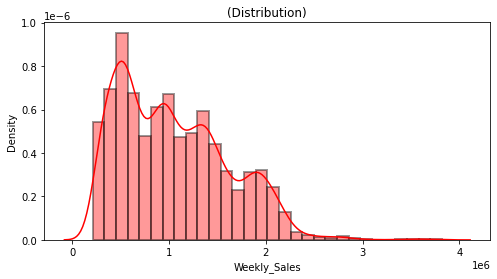

In [11]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(df[target], color='r',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('(Distribution)')
plt.show()

                               Visualising Categorical Features:                                


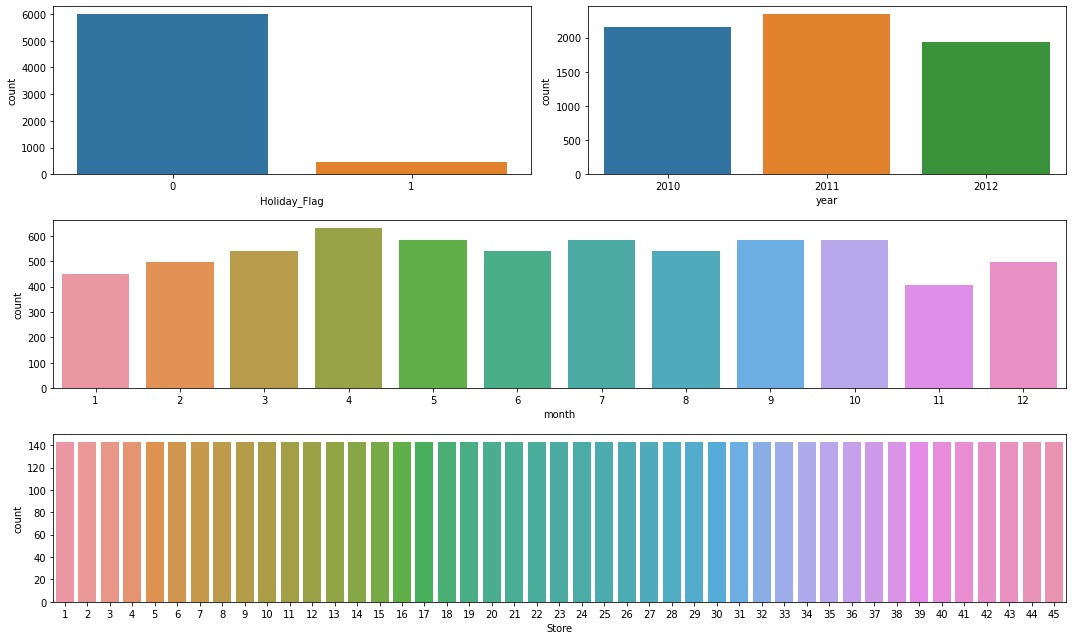

In [12]:
#Visualising the categorical features 

print('\033[1mVisualising Categorical Features:'.center(100))

n=2
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=8:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df[cf[i]])
    else:
        plt.subplot(3,1,i-1)
        sns.countplot(df[cf[i]])
        
plt.tight_layout()
plt.show()

                                                Numeric Features Distribution                                                 


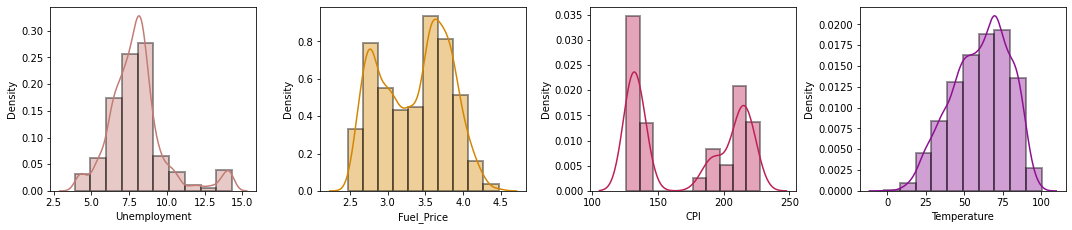

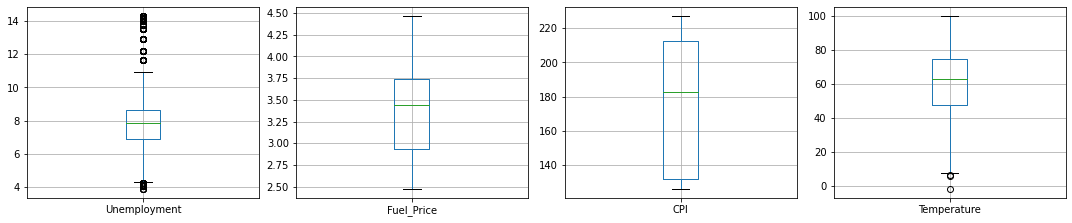

In [13]:
#Visualising the numeric features 

print('\033[1mNumeric Features Distribution'.center(130))

n=4

clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,6*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,6*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

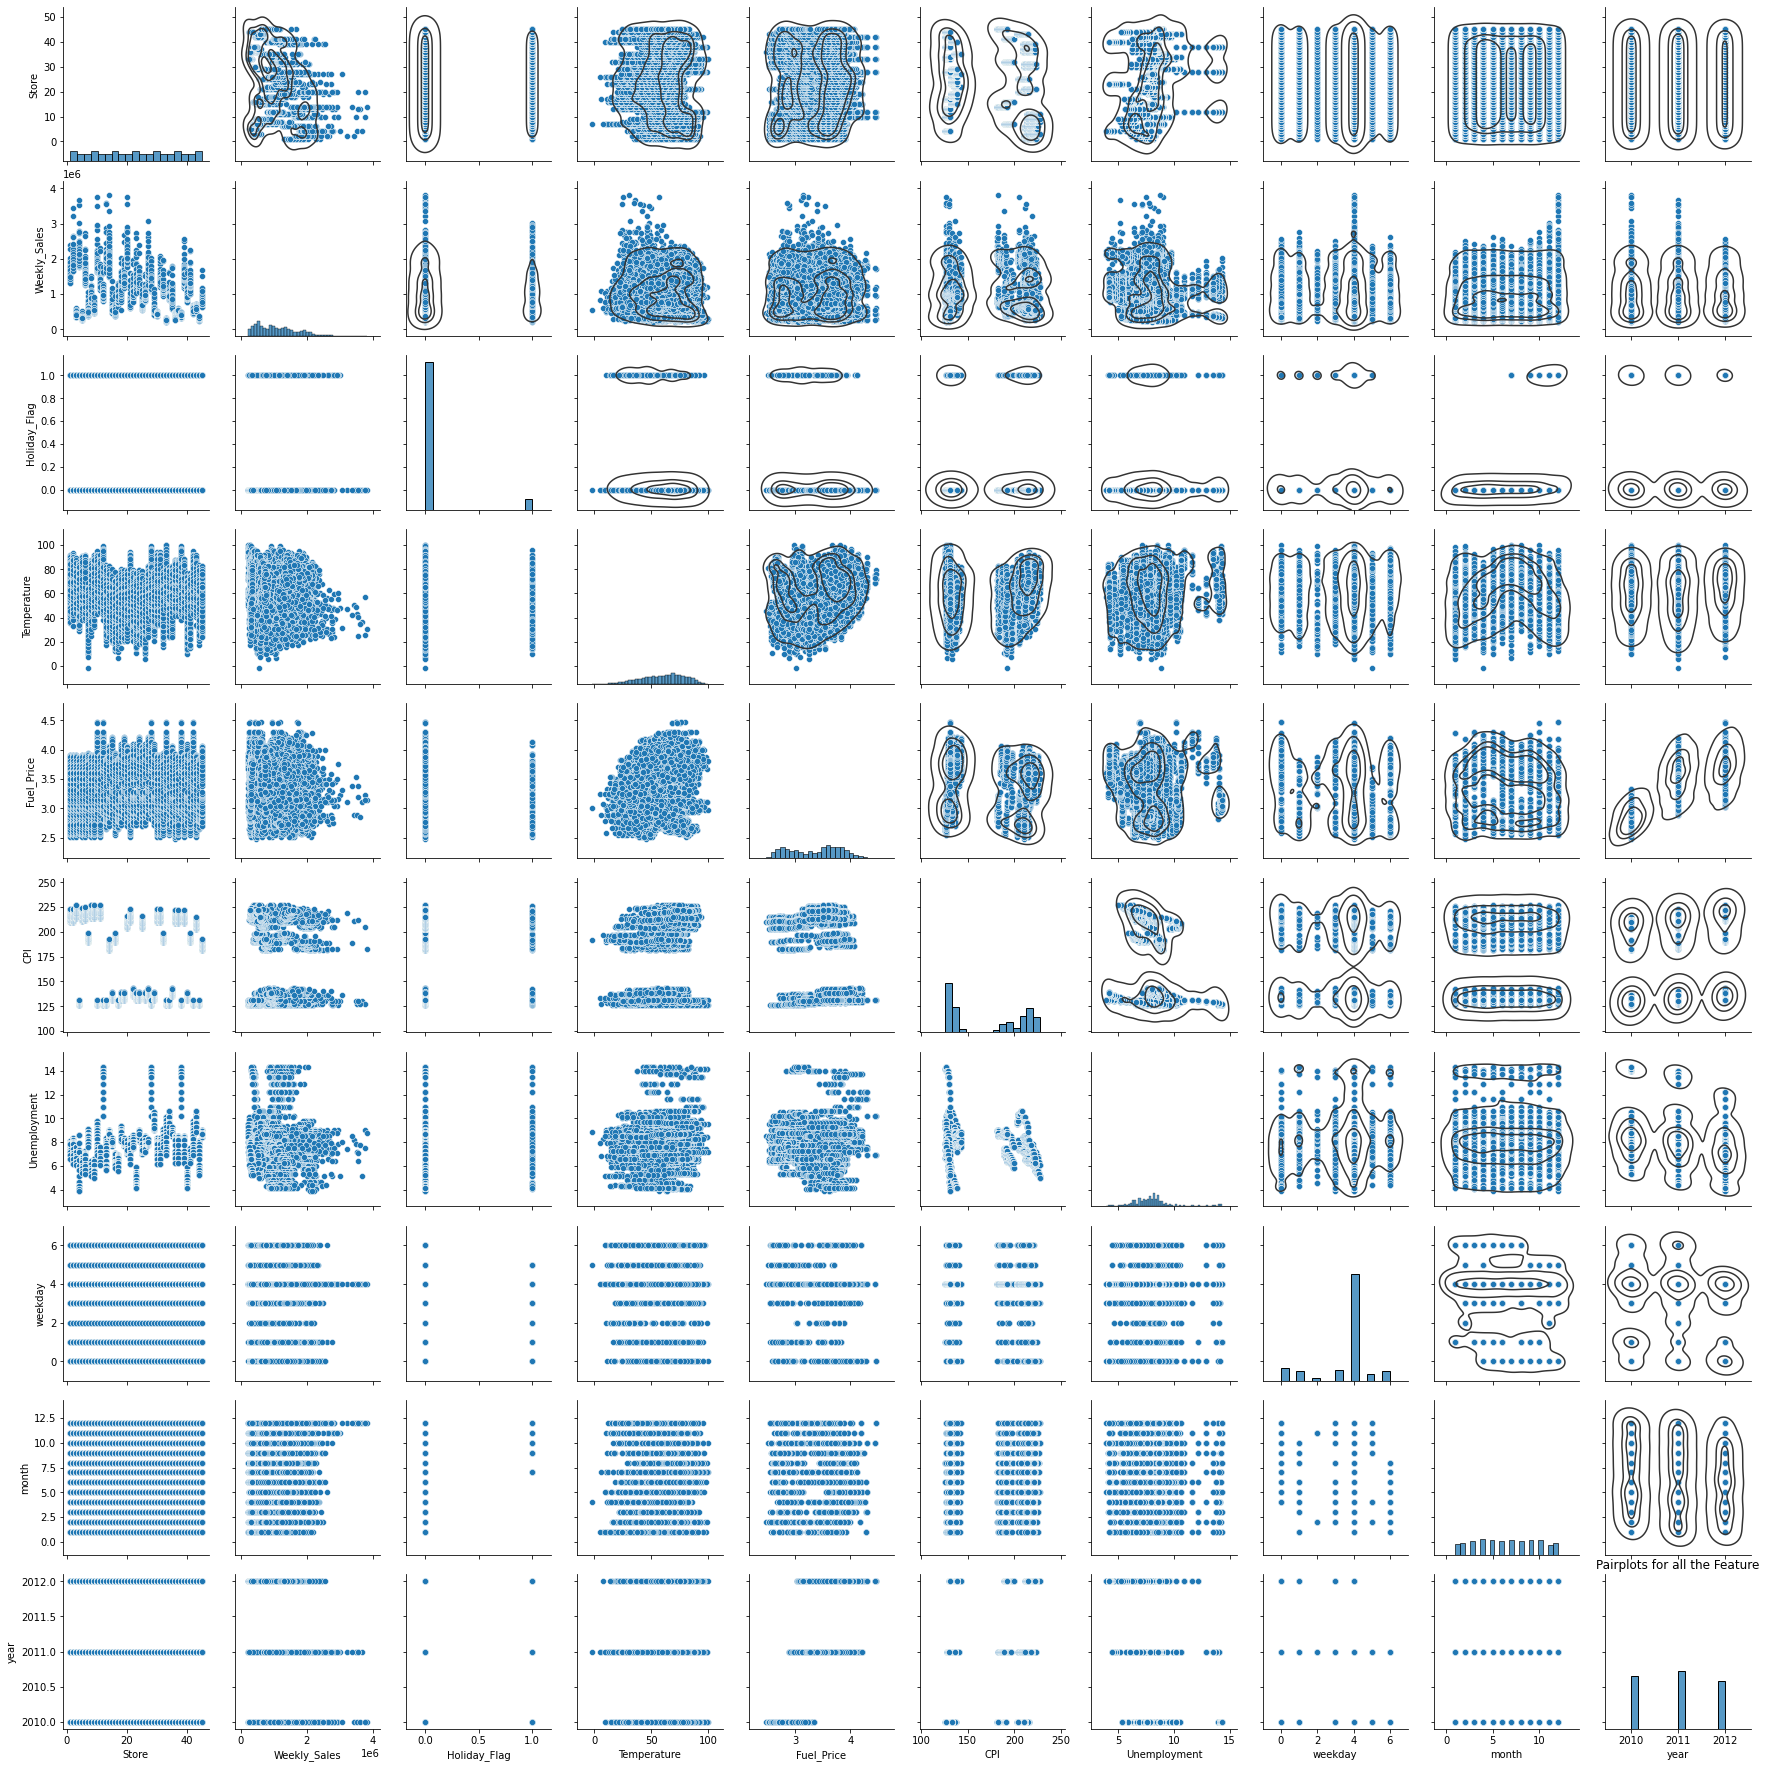

In [14]:
#Understanding the relationship between all the features

g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

Data Preprocessing

In [15]:
#Removal of any Duplicate rows (if any)

counter = 0
rs,cs = originaldata_df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')


Inference: Number of duplicates dropped/fixed ---> 0


In [16]:
#Check for empty elements

nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

              Total Null Values  Percentage
Store                         0         0.0
Weekly_Sales                  0         0.0
Holiday_Flag                  0         0.0
Temperature                   0         0.0
Fuel_Price                    0         0.0
CPI                           0         0.0
Unemployment                  0         0.0
weekday                       0         0.0
month                         0         0.0
year                          0         0.0


In [17]:
#Converting categorical Columns to Numeric

df3 = df.copy()

ecc = nvc[nvc['Percentage']!=0].index.values
fcc = [i for i in cf if i not in ecc]
#One-Hot Binay Encoding
oh=True
dm=True
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
        
df3.shape

One-Hot Encoding on features:
Holiday_Flag

Dummy Encoding on features:
year
weekday
month
Store


(6435, 69)

In [18]:
#Removal of outlier:

df1 = df3.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = nf

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df3.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year_2011,year_2012,weekday_1,weekday_2,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,1643690.90,0,42.31,2.572,211.096358,8.106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1641957.44,1,38.51,2.548,211.242170,8.106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1611968.17,0,39.93,2.514,211.289143,8.106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1409727.59,0,46.63,2.561,211.319643,8.106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1554806.68,0,46.50,2.625,211.350143,8.106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Inference:
Before removal of outliers, The dataset had 6435 samples.
After removal of outliers, The dataset now has 5953 samples.


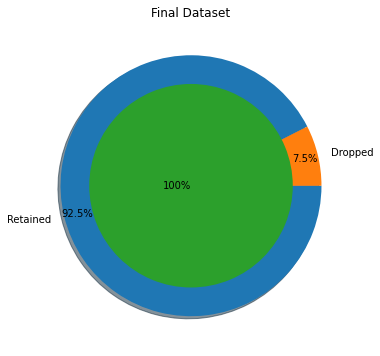


Inference: After the cleanup process, 482 samples were dropped, while retaining 7.49% of the data.


In [19]:
#Final Dataset size after performing Preprocessing

df = df1.copy()
df.columns=[i.replace('-','_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df.shape[0], originaldata_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {original_df.shape[0]-df.shape[0]} samples were dropped, \
while retaining {round(100 - (df.shape[0]*100/(original_df.shape[0])),2)}% of the data.')

 Data Manipulation

In [20]:
#Splitting the data intro training & testing sets

m=[]
for i in df.columns.values:
    m.append(i.replace(' ','_'))
    
df.columns = m
X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.75, test_size=0.25, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (5953, 68) (5953,) 
Training set  --->  (4464, 68) (4464,) 
Testing set   --->  (1489, 68)  (1489,)


In [21]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X) # train data 
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year_2011,year_2012,weekday_1,weekday_2,weekday_3,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
count,4.464000e+03,4.464000e+03,4.464000e+03,4.464000e+03,4.464000e+03,4.464000e+03,4.464000e+03,4.464000e+03,4.464000e+03,4.464000e+03,...,4.464000e+03,4.464000e+03,4.464000e+03,4.464000e+03,4.464000e+03,4.464000e+03,4.464000e+03,4.464000e+03,4.464000e+03,4.464000e+03
mean,-1.034616e-17,4.456809e-17,-1.122957e-15,8.276932e-17,-1.176279e-15,6.366870e-18,3.183435e-17,5.491426e-17,-2.268198e-17,-2.506955e-17,...,1.153995e-17,2.307991e-17,-2.228405e-17,-5.252668e-17,-1.591718e-18,1.591718e-18,-6.526042e-17,2.228405e-17,-4.934325e-17,9.550306e-18
std,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,...,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00
min,-2.755393e-01,-2.952356e+00,-1.872648e+00,-1.243918e+00,-2.766388e+00,-7.481634e-01,-6.402976e-01,-2.581989e-01,-1.157319e-01,-2.736524e-01,...,-1.574592e-01,-1.604222e-01,-4.494666e-02,-1.544448e-01,-1.280369e-01,-1.567105e-01,-1.589469e-01,-1.604222e-01,-1.544448e-01,-1.513762e-01
25%,-2.755393e-01,-7.313569e-01,-9.885745e-01,-1.072339e+00,-6.769932e-01,-7.481634e-01,-6.402976e-01,-2.581989e-01,-1.157319e-01,-2.736524e-01,...,-1.574592e-01,-1.604222e-01,-4.494666e-02,-1.544448e-01,-1.280369e-01,-1.567105e-01,-1.589469e-01,-1.604222e-01,-1.544448e-01,-1.513762e-01
50%,-2.755393e-01,1.087944e-01,1.676891e-01,3.876354e-01,9.592944e-02,-7.481634e-01,-6.402976e-01,-2.581989e-01,-1.157319e-01,-2.736524e-01,...,-1.574592e-01,-1.604222e-01,-4.494666e-02,-1.544448e-01,-1.280369e-01,-1.567105e-01,-1.589469e-01,-1.604222e-01,-1.544448e-01,-1.513762e-01
75%,-2.755393e-01,7.748506e-01,8.383656e-01,9.970451e-01,6.144418e-01,1.336606e+00,1.561774e+00,-2.581989e-01,-1.157319e-01,-2.736524e-01,...,-1.574592e-01,-1.604222e-01,-4.494666e-02,-1.544448e-01,-1.280369e-01,-1.567105e-01,-1.589469e-01,-1.604222e-01,-1.544448e-01,-1.513762e-01
max,3.629246e+00,2.170320e+00,2.473684e+00,1.344659e+00,2.578651e+00,1.336606e+00,1.561774e+00,3.872983e+00,8.640661e+00,3.654271e+00,...,6.350853e+00,6.233550e+00,2.224860e+01,6.474803e+00,7.810250e+00,6.381193e+00,6.291408e+00,6.233550e+00,6.474803e+00,6.606058e+00



                                          Standardardization on Testing set                                          


,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year_2011,year_2012,weekday_1,weekday_2,weekday_3,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
count,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,...,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000
mean,-0.005430,0.051761,0.064933,0.034243,-0.041442,0.065303,0.034077,0.010924,0.031286,0.008609,...,-0.004477,-0.027304,0.074831,0.019189,0.021239,0.001358,-0.015991,-0.027304,0.019189,0.043768
std,0.991171,0.992836,0.982222,1.001960,1.013480,1.017279,1.015349,1.019838,1.125426,1.014752,...,0.986361,0.913233,1.630245,1.059087,1.078654,1.004555,0.949888,0.913233,1.059087,1.132013
min,-0.275539,-2.848387,-1.781192,-1.243918,-2.766388,-0.748163,-0.640298,-0.258199,-0.115732,-0.273652,...,-0.157459,-0.160422,-0.044947,-0.154445,-0.128037,-0.156711,-0.158947,-0.160422,-0.154445,-0.151376
25%,-0.275539,-0.647694,-0.864456,-1.069121,-0.700415,-0.748163,-0.640298,-0.258199,-0.115732,-0.273652,...,-0.157459,-0.160422,-0.044947,-0.154445,-0.128037,-0.156711,-0.158947,-0.160422,-0.154445,-0.151376
50%,-0.275539,0.179732,0.293985,0.409814,0.068469,-0.748163,-0.640298,-0.258199,-0.115732,-0.273652,...,-0.157459,-0.160422,-0.044947,-0.154445,-0.128037,-0.156711,-0.158947,-0.160422,-0.154445,-0.151376
75%,-0.275539,0.821962,0.851431,1.019861,0.614442,1.336606,1.561774,-0.258199,-0.115732,-0.273652,...,-0.157459,-0.160422,-0.044947,-0.154445,-0.128037,-0.156711,-0.158947,-0.160422,-0.154445,-0.151376
max,3.629246,2.144327,2.473684,1.349680,2.578651,1.336606,1.561774,3.872983,8.640661,3.654271,...,6.350853,6.233550,22.248595,6.474803,7.810250,6.381193,6.291408,6.233550,6.474803,6.606058


. Feature Selection/Extraction

                                       Correlation Matrix                                       


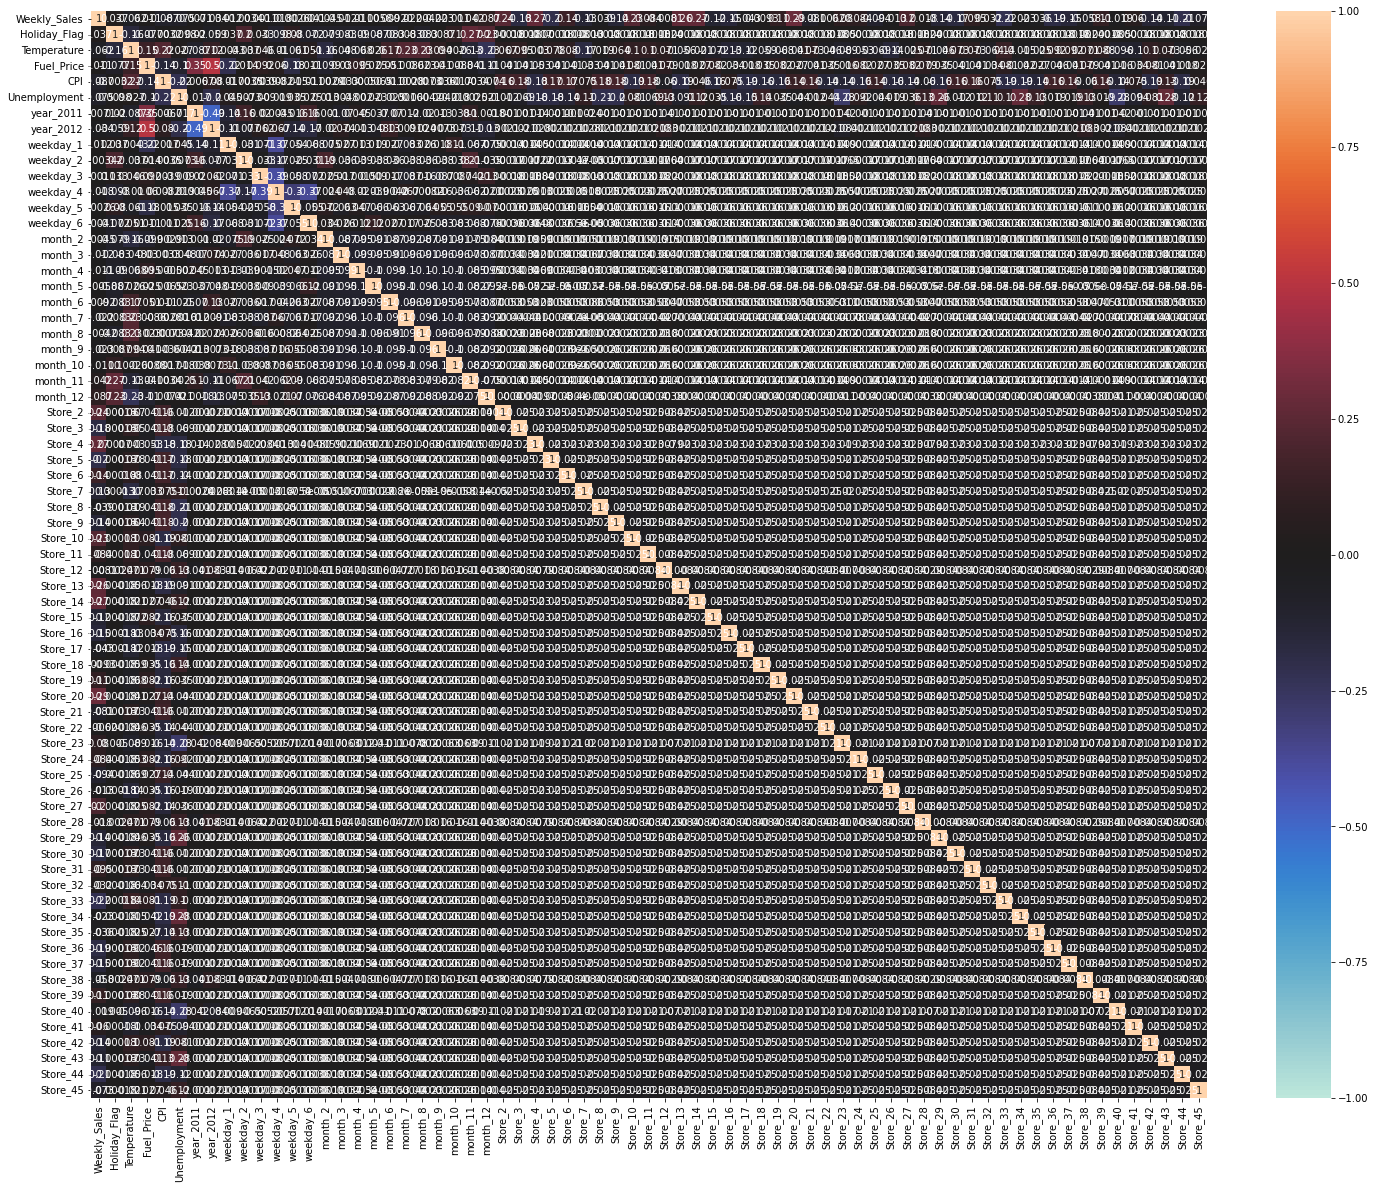

In [22]:
#Checking the correlation

print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[25,20])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

Dropped Features -->  ['CPI', 'Unemployment', 'Fuel_Price', 'weekday_4', 'month_7', 'Store_25', 'Temperature', 'month_12', 'year_2012', 'Store_30', 'month_2', 'Store_29', 'month_10', 'Store_16', 'month_11', 'Store_6', 'Store_17', 'month_5', 'Store_18', 'Holiday_Flag', 'Store_43', 'year_2011', 'Store_19', 'month_9', 'Store_20', 'Store_22', 'Store_15', 'Store_14', 'Store_37', 'month_3', 'Store_21', 'Store_3', 'Store_23', 'Store_13', 'Store_24', 'Store_26', 'month_4', 'weekday_1', 'Store_27', 'Store_45', 'Store_44', 'Store_11', 'Store_42', 'weekday_5', 'weekday_2', 'weekday_3', 'Store_41', 'Store_40', 'Store_39', 'Store_10', 'Store_35', 'Store_9', 'month_6', 'Store_2', 'Store_4', 'Store_7']


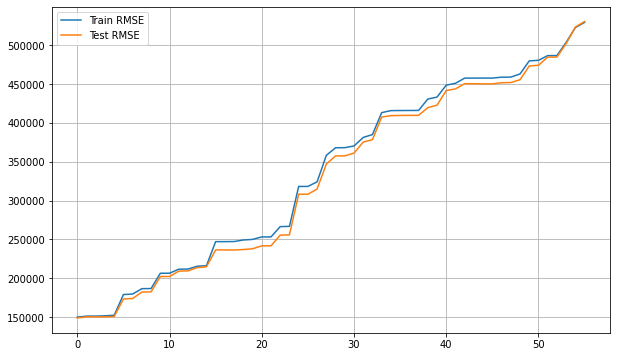

In [23]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
#Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
#Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

DROP=[];b=[]

for i in range(len(Train_X_std.columns)):
    vif = pd.DataFrame()
    X = Train_X_std.drop(DROP,axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>1:
        DROP.append(vif.loc[0][0])
        LR = LinearRegression()
        LR.fit(Train_X_std.drop(DROP,axis=1), Train_Y)

        pred1 = LR.predict(Train_X_std.drop(DROP,axis=1))
        pred2 = LR.predict(Test_X_std.drop(DROP,axis=1))
        
        Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
        Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

        
print('Dropped Features --> ',DROP)


plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')

plt.legend()
plt.grid()
plt.show()

In [24]:
#Shortlisting the selected Features (with RFE)

lm = LinearRegression()
rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-28)             # running RFE
rfe = rfe.fit(Train_X_std, Train_Y)

LR = LinearRegression()
LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

#print(Train_X_std.loc[:,rfe.support_].columns)

pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

print(np.sqrt(mean_squared_error(Train_Y, pred1)))
print(np.sqrt(mean_squared_error(Test_Y, pred2)))

Train_X_std = Train_X_std.loc[:,rfe.support_]
Test_X_std = Test_X_std.loc[:,rfe.support_]
152984.3455868294
157283.79051514965

158537.67739081604
159739.98430985078


157283.79051514965

In [25]:
#Let us first define a function to evaluate our models

Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(Train_X_std.loc[:,Train_X_std.nunique()>=50].columns.values,2,replace=False)
def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()

    #Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))
    
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()

Multiple Linear Regression(MLR)

<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Intercept of the Regresion Model was found to be  1046848.7792473116


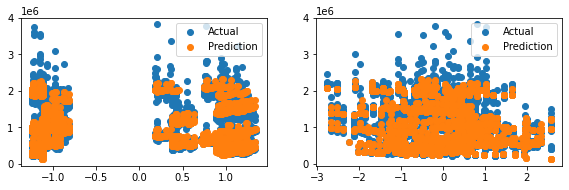



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9227968820093696
Residual Sum of Squares (RSS) on Training set  ---> 112199047160645.98
Mean Squared Error (MSE) on Training set       ---> 25134195152.47446
Root Mean Squared Error (RMSE) on Training set ---> 158537.67739081604

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9232719523901383
Residual Sum of Squares (RSS) on Training set  ---> 37994608392506.63
Mean Squared Error (MSE) on Training set       ---> 25516862587.311367
Root Mean Squared Error (RMSE) on Training set ---> 159739.98430985078

--------------------Residual Plots--------------------


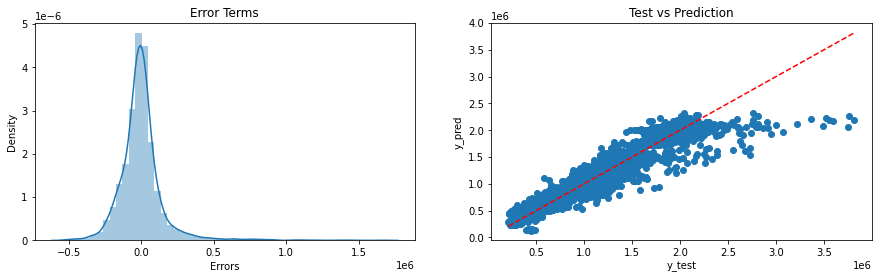

In [26]:
#Linear Regression

MLR = LinearRegression().fit(Train_X_std,Train_Y)# training data with linear regression 
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)

 Ridge Regression Model

<<<----------------------------------- Evaluating Ridge Regression Model ----------------------------------->>>

The Intercept of the Regresion Model was found to be  1046848.7792473116


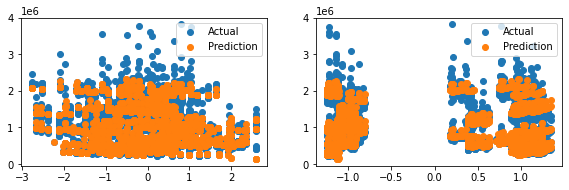



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9227956690201189
Residual Sum of Squares (RSS) on Training set  ---> 112200809994087.19
Mean Squared Error (MSE) on Training set       ---> 25134590052.438885
Root Mean Squared Error (RMSE) on Training set ---> 158538.9228310792

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9233010753619469
Residual Sum of Squares (RSS) on Training set  ---> 37980187122272.81
Mean Squared Error (MSE) on Training set       ---> 25507177382.318882
Root Mean Squared Error (RMSE) on Training set ---> 159709.66590134386

--------------------Residual Plots--------------------


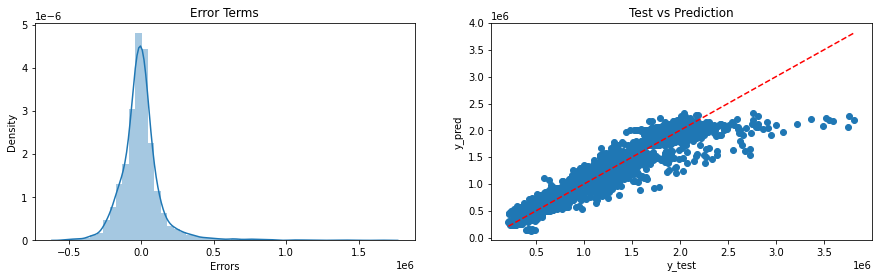

In [ ]:
#Creating a Ridge Regression model

RLR = Ridge().fit(Train_X_std,Train_Y)
pred1 = RLR.predict(Train_X_std)
pred2 = RLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(1, pred1, pred2)

Lasso Regression Model

<<<----------------------------------- Evaluating Lasso Regression Model ----------------------------------->>>

The Intercept of the Regresion Model was found to be  1046848.7792473116


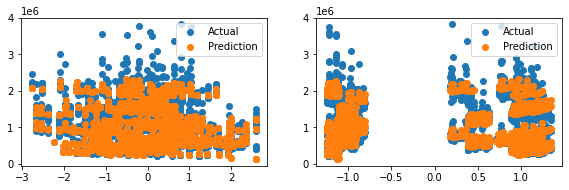



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9227968812228542
Residual Sum of Squares (RSS) on Training set  ---> 112199048303686.4
Mean Squared Error (MSE) on Training set       ---> 25134195408.531902
Root Mean Squared Error (RMSE) on Training set ---> 158537.67819837623

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9232727913976086
Residual Sum of Squares (RSS) on Training set  ---> 37994192928262.85
Mean Squared Error (MSE) on Training set       ---> 25516583564.985123
Root Mean Squared Error (RMSE) on Training set ---> 159739.11094339145

--------------------Residual Plots--------------------


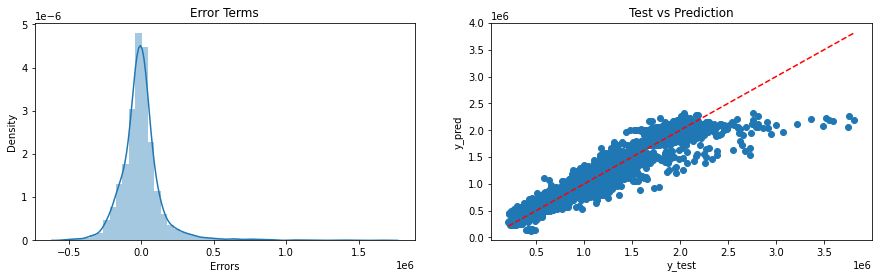

In [ ]:
#Creating a Ridge Regression model

LLR = Lasso().fit(Train_X_std,Train_Y)
pred1 = LLR.predict(Train_X_std)
pred2 = LLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(2, pred1, pred2)


Using neural network 

In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(64, input_dim=Train_X.shape[1], kernel_initializer='normal',activation='relu'))
  model.add(Dense(32, kernel_initializer='normal'))
  model.add(Dense(1, kernel_initializer='normal'))
  model.compile(loss='mean_absolute_error', optimizer='adam')
  return model
  

In [ ]:
estimator_model = KerasRegressor(build_fn=create_model, verbose=1)

In [ ]:
history = estimator_model.fit(Train_X,Train_Y,  validation_split=0.2, epochs=4000, batch_size=500)

Streaming output truncated to the last 5000 lines.
8/8 [==============================] - 0s 7ms/step - loss: 192968.9062 - val_loss: 197827.3906
Epoch 1502/4000
8/8 [==============================] - 0s 7ms/step - loss: 192600.5938 - val_loss: 197462.6875
Epoch 1503/4000
8/8 [==============================] - 0s 8ms/step - loss: 192287.5938 - val_loss: 197344.1406
Epoch 1504/4000
8/8 [==============================] - 0s 8ms/step - loss: 192080.1406 - val_loss: 197156.1719
Epoch 1505/4000
8/8 [==============================] - 0s 7ms/step - loss: 191690.6406 - val_loss: 196265.5000
Epoch 1506/4000
8/8 [==============================] - 0s 9ms/step - loss: 191342.2812 - val_loss: 196166.5938
Epoch 1507/4000
8/8 [==============================] - 0s 7ms/step - loss: 190986.0156 - val_loss: 195618.7812
Epoch 1508/4000
8/8 [==============================] - 0s 7ms/step - loss: 190647.2188 - val_loss: 195723.5312
Epoch 1509/4000
8/8 [==============================] - 0s 7ms/step - loss: 19

FileNotFoundError: ignored

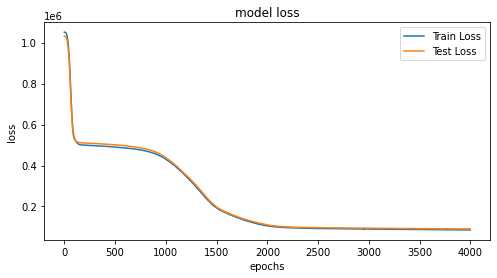

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.savefig('plots/dnn_loss.png')
plt.show()

In [ ]:

dnn_acc = metrics.r2_score(y_pred, Test_Y)*100
print("Deep Neural Network accuracy - ",dnn_acc)

NameError: ignored